Task 1 : **Predict CO2 Emission based on Engine Size(Canada)**

Supervised Learning using Linear Regression(with 2 variables)

Author : Pranali Narkhede

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math

In [ ]:
#loading dataset
df = pd.read_csv("/content/CO2 Emissions_Canada.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.columns.tolist()

['Make',
 'Model',
 'Vehicle Class',
 'Engine Size(L)',
 'Cylinders',
 'Transmission',
 'Fuel Type',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'CO2 Emissions(g/km)']

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.shape

(7385, 12)

In [ ]:
df[['Engine Size(L)','CO2 Emissions(g/km)']]

,Engine Size(L),CO2 Emissions(g/km)
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
7380,2.0,219
7381,2.0,232
7382,2.0,240
7383,2.0,232


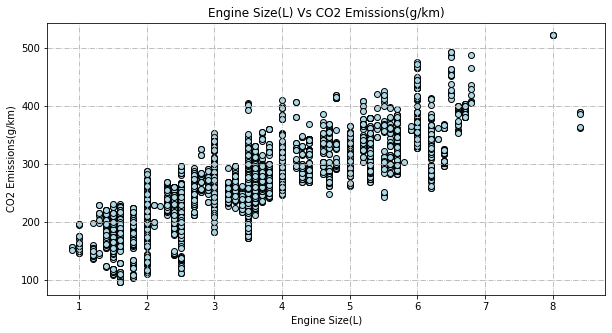

In [ ]:
#plotting scatterplot between Engine Size and CO2 Emissions
plt.figure(figsize=(10,5))
plt.scatter(x=df['Engine Size(L)'],y=df['CO2 Emissions(g/km)'],c='lightblue',edgecolors='black')
plt.title("Engine Size(L) Vs CO2 Emissions(g/km)")
plt.xlabel("Engine Size(L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.grid(linestyle='-.')
plt.show()

In [ ]:
x=df['Engine Size(L)'].values
y=df['CO2 Emissions(g/km)'].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
#splitting data into training and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#comparing the predicted data with the actual data
y_pred = pd.DataFrame(reg.predict(x_test))
test = pd.DataFrame(y_test)
df1= pd.concat([test,y_pred],axis=1)
df1.columns = ['Predicted','Actual']
df1

,Predicted,Actual
0,202,207.588832
1,214,185.339054
2,174,189.047350
3,220,200.172239
4,264,207.588832
...,...,...
1472,187,185.339054
1473,188,207.588832
1474,177,207.588832
1475,114,189.047350


In [ ]:
#calculating intercept and coefficient of the regressin line
print(reg.intercept_)  
print(reg.coef_)

[133.42290595]
[[37.08296287]]


## Visualizing the result

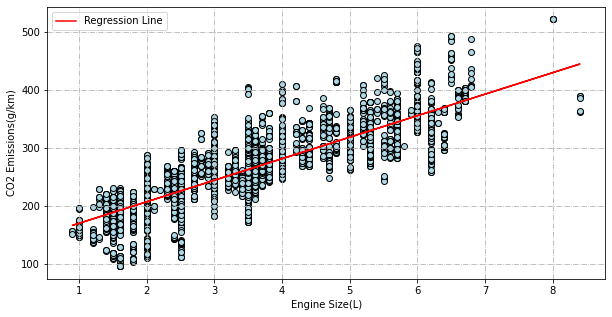

In [ ]:
line = reg.coef_*x + reg.intercept_
plt.figure(figsize=(10,5))
plt.scatter(x=df['Engine Size(L)'],y=df['CO2 Emissions(g/km)'],c='lightblue',edgecolors='black')
plt.plot(x,line,color='red',label='Regression Line')
plt.title('')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.grid(linestyle='-.')
plt.legend()

In [ ]:
print('Training Score = {}'.format(reg.score(x_train,y_train)))

Training Score = 0.7294404932957088


## Evaluating the model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

In [ ]:
print('Mean Absolute Error = {}'.format(MAE))
print('\nMean Squared Error = {}'.format(MSE))
print('\nRoot Mean Squared Error = {}'.format(RMSE))
print('\nr2_score = {}'.format(r2))

Mean Absolute Error = 24.196277243500763

Mean Squared Error = 1007.7538064841182

Root Mean Squared Error = 31.745138312568717

r2_score = 0.7040244493456675


# THANK YOU